<h1> Wine Quality Prediction </h1>

In [2]:
import pandas as pd
import sklearn.linear_model
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

<h1>Data Preprocessing</h1>

In [3]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [4]:
# We randomize the dataset
data.reindex(np.random.permutation(data.index))

# We split features / labels
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# We normalize X
X = (X - X.mean()) / (X.max() - X.min())

X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382


<h1>Ordinary Least Square</h1>

In [5]:
ols = sklearn.linear_model.LinearRegression()

In [6]:
# 10-fold cross validation
scores = np.absolute(cross_validation.cross_val_score(ols, X, y, cv=10, scoring='mean_squared_error'))
print('The MSE of the model is: {}'.format(scores.mean()))

The MSE of the model is: 0.43518490403


In [7]:
# Coefficients
ols.fit(X,y)
coefs = pd.DataFrame({'Feature':X.columns, 'Coefficient':ols.coef_})
coefs.loc[len(coefs)] = [ols.intercept_, 'Intercept']
coefs.head(30)

,Coefficient,Feature
0,0.282393,fixed acidity
1,-1.582042,volatile acidity
2,-0.182564,citric acid
3,0.238437,residual sugar
4,-1.122661,chlorides
5,0.309655,free sulfur dioxide
6,-0.923876,total sulfur dioxide
7,-0.243541,density
8,-0.525339,pH
9,1.530278,sulphates


<h1>Ridge Regression</h1>

In [8]:
ridge = sklearn.linear_model.Ridge()

<h3> Hyperparameter Tuning</h3>

Best Hyperparameter:1.84206996933


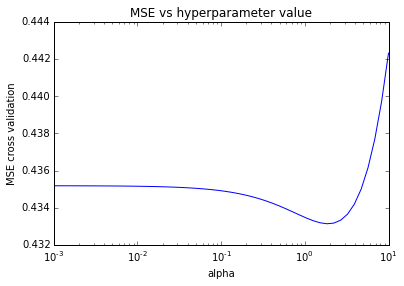

In [9]:
# Hyperparameter: alpha
alphas = np.logspace(-3,1,50)

results = []

for alpha in alphas:
    ridge = sklearn.linear_model.Ridge(alpha)
    score = np.absolute(cross_validation.cross_val_score(ridge, X, y, cv=10, scoring='mean_squared_error')).mean()
    results.append(score)

plt.semilogx(alphas,results)
plt.title('MSE vs hyperparameter value')
plt.ylabel('MSE cross validation')
plt.xlabel('alpha')
    
print('Best Hyperparameter:{}'.format(alphas[np.argmin(results)]))

<h3>Minimum Cross Validation Error (MSE)</h3>

In [10]:
# Minimum cross validation error
print('Minimum cross validation error:{}'.format(min(results)))

Minimum cross validation error:0.433139550654


<h3>Coefficients</h3>

In [11]:
# Coefficients
ridge = sklearn.linear_model.Ridge(1.84)
ridge.fit(X,y)
ridge_coefs = pd.DataFrame({'Feature':X.columns, 'Coefficient':ridge.coef_})
ridge_coefs.loc[len(ridge_coefs)] = [ridge.intercept_, 'Intercept']
ridge_coefs.head(30)

,Coefficient,Feature
0,0.358628,fixed acidity
1,-1.482523,volatile acidity
2,-0.094337,citric acid
3,0.220323,residual sugar
4,-0.878652,chlorides
5,0.245292,free sulfur dioxide
6,-0.803874,total sulfur dioxide
7,-0.336787,density
8,-0.370848,pH
9,1.334249,sulphates


<h1> Lasso Regression</h1>

In [12]:
lasso = ridge = sklearn.linear_model.Lasso()

<h3> Hyperparameter Tuning</h3>

Best Hyperparameter:0.0494171336132


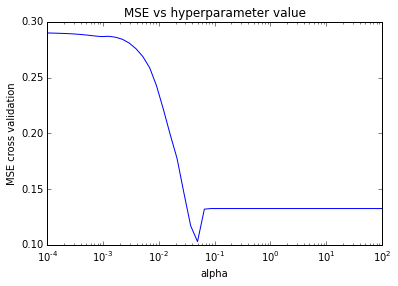

In [13]:
# Hyperparameter: alpha
alphas = np.logspace(-4,2,50)

results = []

for alpha in alphas:
    lasso = sklearn.linear_model.Lasso(alpha)
    score = np.absolute(cross_validation.cross_val_score(lasso, X, y, cv=10)).mean()
    results.append(score)

plt.semilogx(alphas,results)
plt.title('MSE vs hyperparameter value')
plt.ylabel('MSE cross validation')
plt.xlabel('alpha')
    
print('Best Hyperparameter:{}'.format(alphas[np.argmin(results)]))

<h3>Minimum Cross Validation Error (MSE)</h3>

In [14]:
# Minimum cross validation error
print('Minimum cross validation error:{}'.format(min(results)))

Minimum cross validation error:0.102962817166


<h3>Coefficients</h3>


In [15]:
# Coefficients
lasso = sklearn.linear_model.Lasso(0.047)
lasso.fit(X,y)
lasso_coefs = pd.DataFrame({'Feature':X.columns, 'Coefficient':lasso.coef_})
lasso_coefs.loc[len(lasso_coefs)] = [lasso.intercept_, 'Intercept']
lasso_coefs.head(30)

,Coefficient,Feature
0,0.000000,fixed acidity
1,-0.000000,volatile acidity
2,0.000000,citric acid
3,0.000000,residual sugar
4,-0.000000,chlorides
5,-0.000000,free sulfur dioxide
6,-0.000000,total sulfur dioxide
7,-0.000000,density
8,-0.000000,pH
9,0.000000,sulphates
